# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Reading the Data into a DataFrame

In [26]:
Data = pd.read_csv("abtest.csv")
data = Data

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [16]:
data = data.dropna()
data =data.drop_duplicates()
data = data['time_spent_on_the_page']
data.head()

0    3.48
1    7.13
2    4.40
3    3.02
4    4.75
Name: time_spent_on_the_page, dtype: float64

### Univariate Analysis

(array([4., 0., 0., 2., 0., 1., 1., 1., 2., 1., 0., 2., 1., 3., 2., 2., 2.,
        3., 2., 3., 3., 4., 2., 2., 8., 2., 3., 5., 4., 2., 6., 1., 4., 4.,
        2., 0., 1., 2., 2., 3., 2., 0., 2., 0., 1., 0., 0., 0., 1., 2.]),
 array([ 0.19  ,  0.4004,  0.6108,  0.8212,  1.0316,  1.242 ,  1.4524,
         1.6628,  1.8732,  2.0836,  2.294 ,  2.5044,  2.7148,  2.9252,
         3.1356,  3.346 ,  3.5564,  3.7668,  3.9772,  4.1876,  4.398 ,
         4.6084,  4.8188,  5.0292,  5.2396,  5.45  ,  5.6604,  5.8708,
         6.0812,  6.2916,  6.502 ,  6.7124,  6.9228,  7.1332,  7.3436,
         7.554 ,  7.7644,  7.9748,  8.1852,  8.3956,  8.606 ,  8.8164,
         9.0268,  9.2372,  9.4476,  9.658 ,  9.8684, 10.0788, 10.2892,
        10.4996, 10.71  ]),
 <BarContainer object of 50 artists>)

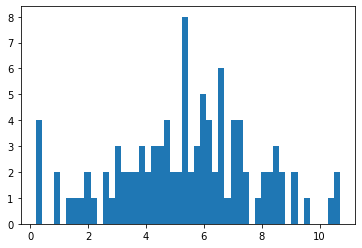

In [18]:
plt.hist(data, bins=50)

C:\Users\slowb\PythonFolderAnaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Density'>

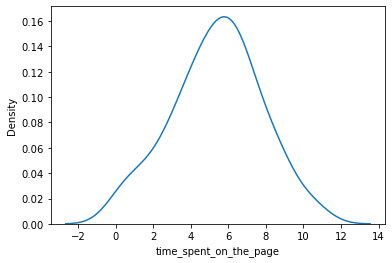

In [21]:
sns.distplot(data, hist = False)

C:\Users\slowb\PythonFolderAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_spent_on_the_page'>

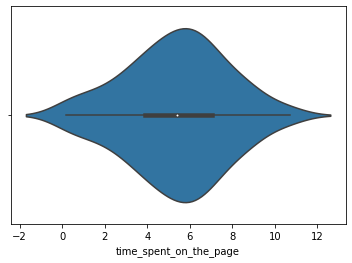

In [23]:
sns.violinplot(data)

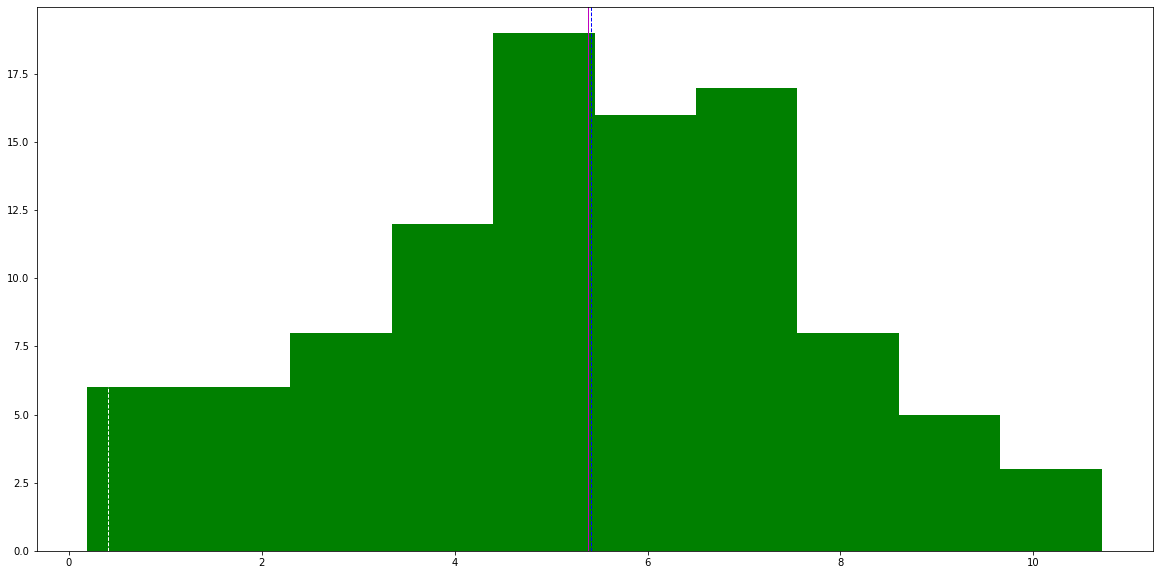

In [24]:
plt.figure(figsize=(20,10)) 
plt.hist(data, color='g') 
plt.axvline(data.mean(), color='m', linewidth=1)
plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data.mode()[0], color='w', linestyle='dashed', linewidth=1)

C:\Users\slowb\PythonFolderAnaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='Density'>

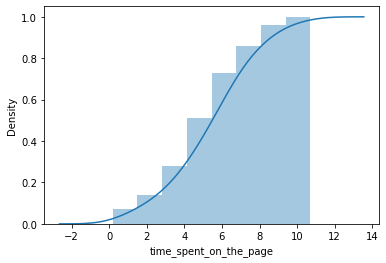

In [25]:
sns.distplot(data, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

### Bivariate Analysis

In [28]:
data1 = Data.dropna()
data1 = data1.drop_duplicates()
data1.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


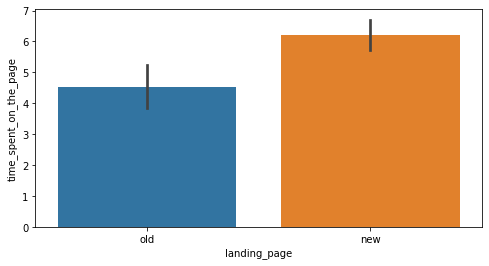

In [35]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="landing_page", y="time_spent_on_the_page", data=data1)

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

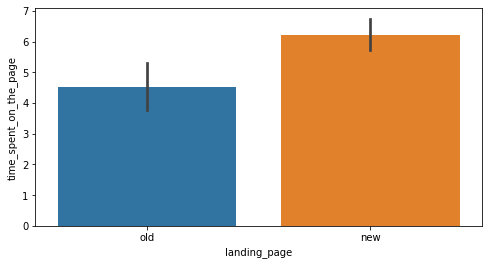

In [36]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="landing_page", y="time_spent_on_the_page", data=data1)

### Step 1: Define the null and alternate hypotheses

The null hypothesis is that the time_spent_on_page mean will not change from its current value.
THe alternate hypothesis is that the time_spent_on_page mean will change from its current value.

### Step 2: Select Appropriate test

Two tail hypothesis test

### Step 3: Decide the significance level

0.05

### Step 4: Collect and prepare data

### Step 5: Calculate the p-value

In [37]:
p_val=1-stats.norm.cdf(2)
p_val

0.02275013194817921

### Step 6: Compare the p-value with $\alpha$

In [38]:
p_val < 0.05

True

### Step 7:  Draw inference

The null hypothesis is rejected. THe alternate hypothesis is that the time_spent_on_page mean will change from its current value.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

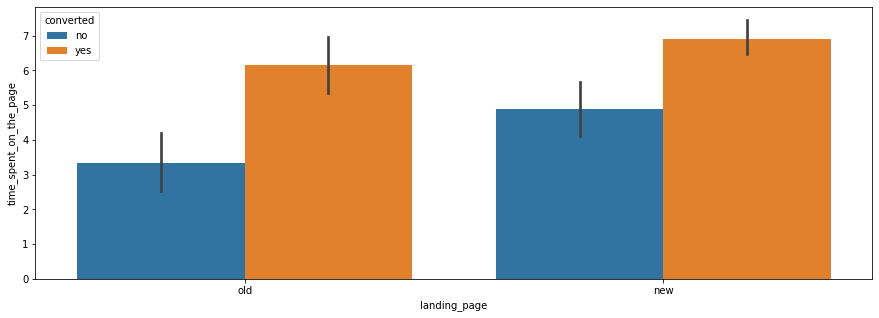

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='landing_page',y='time_spent_on_the_page', hue = "converted")
plt.show()

In [ ]:
#The null hypothesis is that the converted users will not change from the current value
#THe alternate hypothesis is that the converted users will change from its current value.

## 3. Is the conversion and preferred language are independent or related?

In [ ]:
#The conversion and preferred language are independent because logically the preferred language does not affect how many people are converting. Also the p-value is greater than 0.05, so there is no statistical correlation

## 4. Is the time spent on the new page same for the different language users?

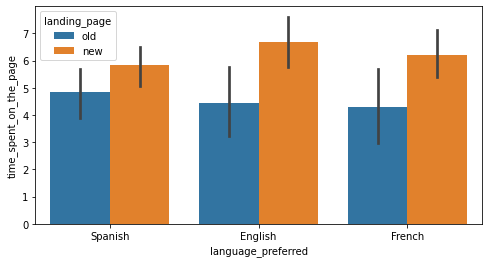

In [51]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="language_preferred", y="time_spent_on_the_page", hue ="landing_page", data=data1)

In [ ]:
#Time spent on the new page is different with English having the highest conversion.

## Conclusion and Business Recommendations

I would recommend that the business utilizes the new page because there is greater time spent on the page and a greater conversion rate, which will help the business grow. 

___